In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import pandas as pd
import numpy as np
import time

import keras.utils as ku
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

from sklearn.metrics import confusion_matrix

# Paramètres
batch_size = 128
epochs = 10
# Vocabulary
# One epoch is when an ENTIRE dataset is passed forward and backward through neural network only once
# Batch_size : total number of training examples present in a single batch. 
# Batch_size : defines the number of samples to work through before updating the internal model parameters
# Batch_size : is the number of samples processed before the model is updated. 



import sys
print(sys.version)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 448237268794513890
]


## I. Chargement des données 

In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255. # Pour normaliser toutes les valeurs 
x_test = x_test.astype('float32') / 255.# Pour normaliser toutes les valeurs 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

## II. Autoencoder simple couche 

### 1. Construction du modèle 

In [5]:
encoder = km.Sequential()
encoder.add(kl.Dense(32, activation='relu', input_shape=(784,)))

decoder = km.Sequential()
decoder.add(kl.Dense(784, activation='sigmoid'))

autoencoder = km.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

### 2. Phase d'apprentissage 

In [6]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

autoencoder.fit(x_train, x_train,
                    batch_size=256,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test,x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.3667 - acc: 0.7472 - val_loss: 0.2711 - val_acc: 0.7975
Epoch 2/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2643 - acc: 0.7983 - val_loss: 0.2541 - val_acc: 0.7977
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2439 - acc: 0.7982 - val_loss: 0.2313 - val_acc: 0.7974
Epoch 4/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2229 - acc: 0.7977 - val_loss: 0.2124 - val_acc: 0.7979
Epoch 5/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2067 - acc: 0.7987 - val_loss: 0.1989 - val_acc: 0.7985
Epoch 6/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1953 - acc: 0.7997 - val_loss: 0.1893 - val_acc: 0.8002
Epoch 7/50
60000/60000 [==============================] - 2s 29us/step - loss: 0

In [10]:
autoencoder_imgs = autoencoder.predict(x_test)

### 3. Affichage résultat final 

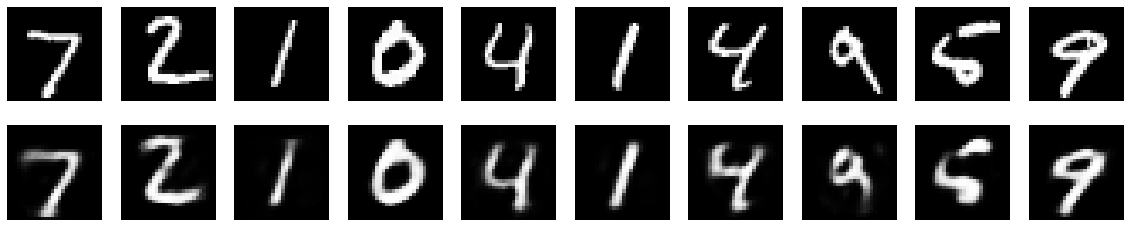

In [11]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 4. Affichage résultats intermédiaires

In [20]:
#### 
### AFFICHAGE RÉSULTATS INTERMÉDIAIRES SORTIES ENCODER###

## III. Autoencoder avec Regularizers :

### 1. Construction du modèle 

In [13]:
from keras import regularizers

encoder = km.Sequential()
encoder.add(kl.Dense(32, activation='relu',activity_regularizer=regularizers.l2(0), input_shape=(784,)))


decoder = km.Sequential()
decoder.add(kl.Dense(784, activation='sigmoid'))

autoencoder = km.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

### 2. Phase d'apprentissage

In [14]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
autoencoder.fit(x_train, x_train,
                    batch_size=256,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.3483 - acc: 0.7621 - val_loss: 0.2703 - val_acc: 0.7962
Epoch 2/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2624 - acc: 0.7982 - val_loss: 0.2507 - val_acc: 0.7976
Epoch 3/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.2405 - acc: 0.7979 - val_loss: 0.2275 - val_acc: 0.7967
Epoch 4/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2202 - acc: 0.7975 - val_loss: 0.2103 - val_acc: 0.7979
Epoch 5/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2057 - acc: 0.7985 - val_loss: 0.1982 - val_acc: 0.7990
Epoch 6/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1950 - acc: 0.7998 - val_loss: 0.1890 - val_acc: 0.8002
Epoch 7/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1867 - acc: 0.8010 - val_loss: 0.1815 - val_acc

In [15]:
autoencoder_imgs = autoencoder.predict(x_test)

### 3. Affichage résultat final : 

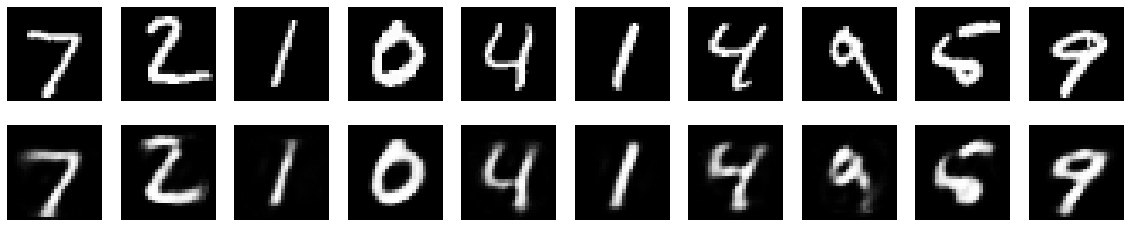

In [16]:

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 4. Affichage résultat intermédiaire 

In [21]:
#### 
### AFFICHAGE RÉSULTATS INTERMÉDIAIRES SORTIES ENCODER###

## IV. Autoencoder avec réseaux de convolution 

### 1. Chargement et traitement de données 

In [18]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

### 2. Construction des données 

In [17]:
from keras import regularizers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

encoder = km.Sequential()
encoder.add(Conv2D(16, kernel_size=(3, 3), input_shape=(28,28,1) ,activation='relu', padding='same'))
encoder.add(MaxPooling2D((2, 2), padding='same'))
encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
encoder.add(MaxPooling2D((2, 2), padding='same'))
encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
encoder.add(MaxPooling2D((2, 2), padding='same'))

decoder = km.Sequential()
decoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Conv2D(16, (3, 3), activation='relu'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))


autoencoder = km.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

### 3. Phase d'apprentissage

In [19]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
autoencoder.fit(x_train, x_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 45s 743us/step - loss: 0.2214 - acc: 0.7940 - val_loss: 0.1732 - val_acc: 0.8006
Epoch 2/50
60000/60000 [==============================] - 42s 707us/step - loss: 0.1597 - acc: 0.7979 - val_loss: 0.1607 - val_acc: 0.7901
Epoch 3/50
60000/60000 [==============================] - 43s 709us/step - loss: 0.1452 - acc: 0.8013 - val_loss: 0.1370 - val_acc: 0.8046
Epoch 4/50
60000/60000 [==============================] - 40s 671us/step - loss: 0.1371 - acc: 0.8035 - val_loss: 0.1323 - val_acc: 0.8016
Epoch 5/50
60000/60000 [==============================] - 39s 652us/step - loss: 0.1316 - acc: 0.8050 - val_loss: 0.1252 - val_acc: 0.8051
Epoch 6/50
  128/60000 [..............................] - ETA: 47s - loss: 0.1223 - acc: 0.8125

KeyboardInterrupt: 

In [ ]:
autoencoder_imgs = autoencoder.predict(x_test)

### 4. Affichage résultat final 

In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 5. Affichage résultat intermédiaire 

In [22]:
#### 
### AFFICHAGE RÉSULTATS INTERMÉDIAIRES SORTIES ENCODER###